In [1]:
# Analisis exploratorio del conjunto de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [2]:
#Carga de archivo csv desde una URL
url = 'https://raw.githubusercontent.com/crisvel23/analisis_exploratorio_datos/master/analisis/MSP_VACUNA_COVID_2021.csv'
df = pd.read_csv(url, encoding='latin-1', sep=";") #index_col=0
print(df.head(8)) 

  fecha_vacuna    zona   provincia    sexo              edad       nom_vacuna  \
0    21/1/2021  ZONA 3  CHIMBORAZO   Mujer   De 25 a 49 años  BNT162b2 PFIZER   
1    21/1/2021  ZONA 3  TUNGURAHUA  Hombre   De 70 a 79 años  BNT162b2 PFIZER   
2    21/1/2021  ZONA 3  TUNGURAHUA  Hombre  De 80 años y más  BNT162b2 PFIZER   
3    21/1/2021  ZONA 3  TUNGURAHUA   Mujer   De 60 a 69 años  BNT162b2 PFIZER   
4    21/1/2021  ZONA 3  TUNGURAHUA   Mujer   De 70 a 79 años  BNT162b2 PFIZER   
5    21/1/2021  ZONA 3  TUNGURAHUA   Mujer  De 80 años y más  BNT162b2 PFIZER   
6    21/1/2021  ZONA 3  TUNGURAHUA  Hombre   De 25 a 49 años  BNT162b2 PFIZER   
7    21/1/2021  ZONA 3  TUNGURAHUA  Hombre   De 60 a 69 años  BNT162b2 PFIZER   

   primera  segunda  
0        1        0  
1        1        0  
2        4        0  
3        1        0  
4        3        0  
5        3        0  
6        1        0  
7        1        0  


In [3]:
#Conocer información básica
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns) 

Cantidad de Filas y columnas: (233764, 8)
Nombre columnas: Index(['fecha_vacuna', 'zona', 'provincia', 'sexo', 'edad', 'nom_vacuna',
       'primera', 'segunda'],
      dtype='object')


In [4]:
#Columnas, nulos y tipo de datos
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233764 entries, 0 to 233763
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   fecha_vacuna  233764 non-null  object
 1   zona          233764 non-null  object
 2   provincia     233764 non-null  object
 3   sexo          233764 non-null  object
 4   edad          233764 non-null  object
 5   nom_vacuna    233764 non-null  object
 6   primera       233764 non-null  int64 
 7   segunda       233764 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 14.3+ MB


In [5]:
#Descripción estadística de los datos numéricos
df.describe() 

,primera,segunda
count,233764.000000,233764.000000
mean,12.495632,6.194145
std,66.432233,36.253294
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,7.000000,2.000000
max,3461.000000,4322.000000


In [6]:
#Cargar de una 2da fuente de datos: vacunacion_formato
url = 'https://raw.githubusercontent.com/crisvel23/analisis_exploratorio_datos/master/analisis/vacunacion_formato.csv'
df_pop = pd.read_csv(url, encoding='latin-1', sep=",")
print(df_pop.head(6)) 

      semana  provincia    sexo   nacionalidad    gedad   nom_vacuna  \
0  2021 - 03      AZUAY  Hombre  ECUATORIANO/A  12 - 17  ASTRAZENECA   
1  2021 - 03      AZUAY  Hombre  ECUATORIANO/A  12 - 17  ASTRAZENECA   
2  2021 - 03      AZUAY  Hombre  ECUATORIANO/A  12 - 17  ASTRAZENECA   
3  2021 - 03      AZUAY  Hombre  ECUATORIANO/A  12 - 17  ASTRAZENECA   
4  2021 - 03      AZUAY  Hombre  ECUATORIANO/A  12 - 17  ASTRAZENECA   
5  2021 - 03      AZUAY  Hombre  ECUATORIANO/A  12 - 17  ASTRAZENECA   

      dosis_aplicada                       grupo_riesgo   n   
0  DOSIS DE REFUERZO  NO PERTENECE A UN GRUPO DE RIESGO    0  
1  DOSIS DE REFUERZO     PERTENECE A UN GRUPO DE RIESGO    0  
2      PRIMERA DOSIS  NO PERTENECE A UN GRUPO DE RIESGO    0  
3      PRIMERA DOSIS     PERTENECE A UN GRUPO DE RIESGO    0  
4      SEGUNDA DOSIS  NO PERTENECE A UN GRUPO DE RIESGO    0  
5      SEGUNDA DOSIS     PERTENECE A UN GRUPO DE RIESGO    0  


In [7]:
df_pop_es = df_pop[df_pop[" nacionalidad"] == ' Ecuatoriano/a' ]
df_pop_es.head() 

,semana,provincia,sexo,nacionalidad,gedad,nom_vacuna,dosis_aplicada,grupo_riesgo,n


In [8]:
df_pop_es.shape 

(0, 9)

In [9]:
df_pop_ar = df_pop[(df_pop[" provincia"] == 'PICHINCHA')]
df_pop_ar.head() 

,semana,provincia,sexo,nacionalidad,gedad,nom_vacuna,dosis_aplicada,grupo_riesgo,n
6912,2021 - 03,PICHINCHA,Hombre,ECUATORIANO/A,12 - 17,ASTRAZENECA,DOSIS DE REFUERZO,NO PERTENECE A UN GRUPO DE RIESGO,0
6913,2021 - 03,PICHINCHA,Hombre,ECUATORIANO/A,12 - 17,ASTRAZENECA,DOSIS DE REFUERZO,PERTENECE A UN GRUPO DE RIESGO,0
6914,2021 - 03,PICHINCHA,Hombre,ECUATORIANO/A,12 - 17,ASTRAZENECA,PRIMERA DOSIS,NO PERTENECE A UN GRUPO DE RIESGO,0
6915,2021 - 03,PICHINCHA,Hombre,ECUATORIANO/A,12 - 17,ASTRAZENECA,PRIMERA DOSIS,PERTENECE A UN GRUPO DE RIESGO,0
6916,2021 - 03,PICHINCHA,Hombre,ECUATORIANO/A,12 - 17,ASTRAZENECA,SEGUNDA DOSIS,NO PERTENECE A UN GRUPO DE RIESGO,0


In [10]:
df_pop_ar.shape 

(19584, 9)

<AxesSubplot:xlabel=' gedad'>

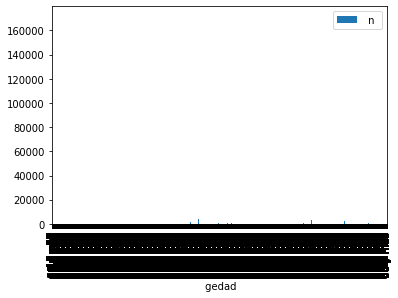

In [11]:
df_pop_ar.set_index(' gedad').plot(kind='bar') 

In [12]:
#Carga del 1er archivo MSP_VACUNA_COVID_2021
url = 'https://raw.githubusercontent.com/crisvel23/analisis_exploratorio_datos/master/analisis/MSP_VACUNA_COVID_2021.csv'
df = pd.read_csv(url, encoding='latin-1', sep=";") #index_col=0
print(df.head(8)) 

  fecha_vacuna    zona   provincia    sexo              edad       nom_vacuna  \
0    21/1/2021  ZONA 3  CHIMBORAZO   Mujer   De 25 a 49 años  BNT162b2 PFIZER   
1    21/1/2021  ZONA 3  TUNGURAHUA  Hombre   De 70 a 79 años  BNT162b2 PFIZER   
2    21/1/2021  ZONA 3  TUNGURAHUA  Hombre  De 80 años y más  BNT162b2 PFIZER   
3    21/1/2021  ZONA 3  TUNGURAHUA   Mujer   De 60 a 69 años  BNT162b2 PFIZER   
4    21/1/2021  ZONA 3  TUNGURAHUA   Mujer   De 70 a 79 años  BNT162b2 PFIZER   
5    21/1/2021  ZONA 3  TUNGURAHUA   Mujer  De 80 años y más  BNT162b2 PFIZER   
6    21/1/2021  ZONA 3  TUNGURAHUA  Hombre   De 25 a 49 años  BNT162b2 PFIZER   
7    21/1/2021  ZONA 3  TUNGURAHUA  Hombre   De 60 a 69 años  BNT162b2 PFIZER   

   primera  segunda  
0        1        0  
1        1        0  
2        4        0  
3        1        0  
4        3        0  
5        3        0  
6        1        0  
7        1        0  


In [15]:
#Filtro por provincias
df_provincia = df.replace(np.nan, '', regex=True)
df_provincia = df_provincia[ df_provincia['provincia'].str.contains('PICHINCHA') ]
df_provincia  

,fecha_vacuna,zona,provincia,sexo,edad,nom_vacuna,primera,segunda
40,21/1/2021,ZONA 9,PICHINCHA,Hombre,De 25 a 49 años,BNT162b2 PFIZER,1,0
41,21/1/2021,ZONA 9,PICHINCHA,Mujer,De 25 a 49 años,BNT162b2 PFIZER,1,0
42,21/1/2021,ZONA 9,PICHINCHA,Hombre,De 25 a 49 años,BNT162b2 PFIZER,1,0
43,21/1/2021,ZONA 9,PICHINCHA,Hombre,De 50 a 59 años,BNT162b2 PFIZER,1,0
44,21/1/2021,ZONA 9,PICHINCHA,Hombre,De 25 a 49 años,BNT162b2 PFIZER,51,0
...,...,...,...,...,...,...,...,...
233759,30/6/2021,ZONA 9,PICHINCHA,Mujer,De 50 a 59 años,CoronaVac SINOVAC,22,4
233760,30/6/2021,ZONA 9,PICHINCHA,Mujer,De 60 a 69 años,BNT162b2 PFIZER,2,1
233761,30/6/2021,ZONA 9,PICHINCHA,Mujer,De 60 a 69 años,CoronaVac SINOVAC,10,2
233762,30/6/2021,ZONA 9,PICHINCHA,Mujer,De 70 a 79 años,CoronaVac SINOVAC,1,0


In [16]:
df_provincia.shape 

(19190, 8)

In [19]:
df_provincia.shape 

(19190, 8)